<a href="https://colab.research.google.com/github/MuhammadIlhamPradipta/Machine_Learning/blob/main/Asignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df_train = pd.read_csv('/content/drive/MyDrive/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA PREPARATION



In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* MISSING VALUE

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Berdasakan info dari method info() maupun isnull().sum() kita dapatkan beberapa kolom yang terdapat missing value di antaranya kolom LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType,GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, dan MiscFeature.

Disini saya akan mengambil 3 sampel kolom untuk saya handling missing valuenya yaitu :
*  Alley, dengan missing value sebanyak 1369 data
*  LotFrontage, dengan missing value sebanyak 259 data
*  BsmtQual, dengan missing value sebanyak 37 data





In [ ]:
df_train.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
df_train.drop('Alley', axis=1, inplace=True)

**Handling Missing Value**

Kolom Alley :
  - Kolom alley akan saya drop/hapus kolomnya karena terdapat lebih dari 90% missing value pada datanya, sedangkan informasi dari kolom data lain berisi 1460 data. Menurutku kolom alley dihapus karena memberikan informasi yang sedikit dan tidak terlalu penting.

Result :

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Kolom Lotfrontage :
- Kolom ini merupakan data numerik yang memiliki missing value sebanyak 259 data. Untuk handling missing value, nilai yang kosong atau NAN akan saya ganti dengan mean. kolom lonfrontage adalah kaki jalan yang terhubung ke properti. Oleh karena hal itu mungkin terkait dengan jarak yang belum diukur atau belum dihitung sehingga value/nilai tidak boleh kosong jadi diganti dengan rata-rata dari kolom lonfrontage. Diganti dengan mean karena kita tidak tahu seberapa jauh atau dekat kaki jalan yang terhubung dengan properti sehingga saya mengambil rata-ratanya.

In [ ]:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
rata = df_train['LotFrontage'].mean()
rata_rata = round(rata)
rata_rata

70

In [ ]:
df_train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

Result :

In [ ]:
df_train['LotFrontage'].fillna(rata_rata, inplace=True)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  70.,  51.,  50.,  91.,
        72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,  74.,
       115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [ ]:
df_train['LotFrontage'].describe()

count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

Kolom BsmtQual :
- kolom ini merupakan ketinggian ruang bawah tanah (basement) terdapat sebanyak 37 data yang missing value. Berdasarkan data deskripsi, missing value pada fitur ini bukanlah value/nilai yang benar-benar kosong melainkan benar-benar tidak memiliki ruang bawah tanah sehingga mungkin dari pemilik tanah atau yang ingin membangun bangunan di tanah tersebut tidak mau membuat basement atau juga bisa menjadi faktor lainnya seperti tanahnya yang mudah longsor. Jadi untuk mengatasi handling missing value saya akan ganti valuenya menjadi "tidak memiliki basement" atau "no basement"

In [ ]:
df_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
missing_value = df_train[df_train['BsmtQual'].isnull()]
missing_value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.0,8544,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


In [ ]:
missing_value = df_train['BsmtQual'][df_train['BsmtQual'].isnull()]
missing_value

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtQual, dtype: object

In [ ]:
nilai = 'no basement'
df_train['BsmtQual'].fillna(nilai, inplace = True)

In [ ]:
df_train['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
no basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [ ]:
df_train['BsmtQual'].value_counts().sum()

1460

Berdasarkan data diatas NAN sudah diisi/diganti dengan value "no basement" dan tidak memiliki missing value lagi.

*  **DUPLICATE**

In [ ]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [ ]:
df_train.duplicated().any()

False

In [ ]:
df_train[df_train.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Berdasarkan informasi di atas dataframe ini tidak memiliki duplikasi data pada kolom maupun barisnya

*  **OUTLIER**


Kolom LotFrontage

In [ ]:
df_train['LotFrontage'].describe()

count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
df_train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  70.,  51.,  50.,  91.,
        72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,  74.,
       115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

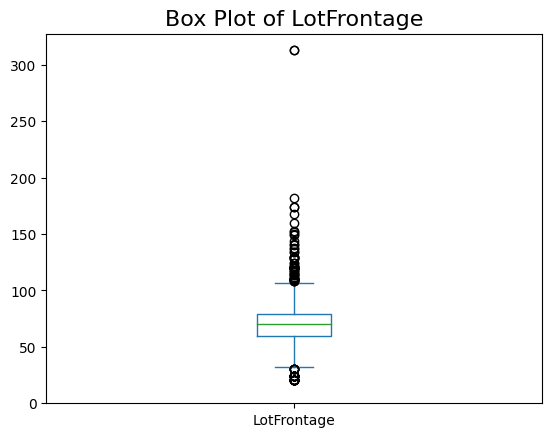

In [ ]:
import matplotlib.pyplot as plt
df_train['LotFrontage'].plot(kind='box')
plt.ylim(0)
plt.title('Box Plot of LotFrontage', size = 16)
plt.show()

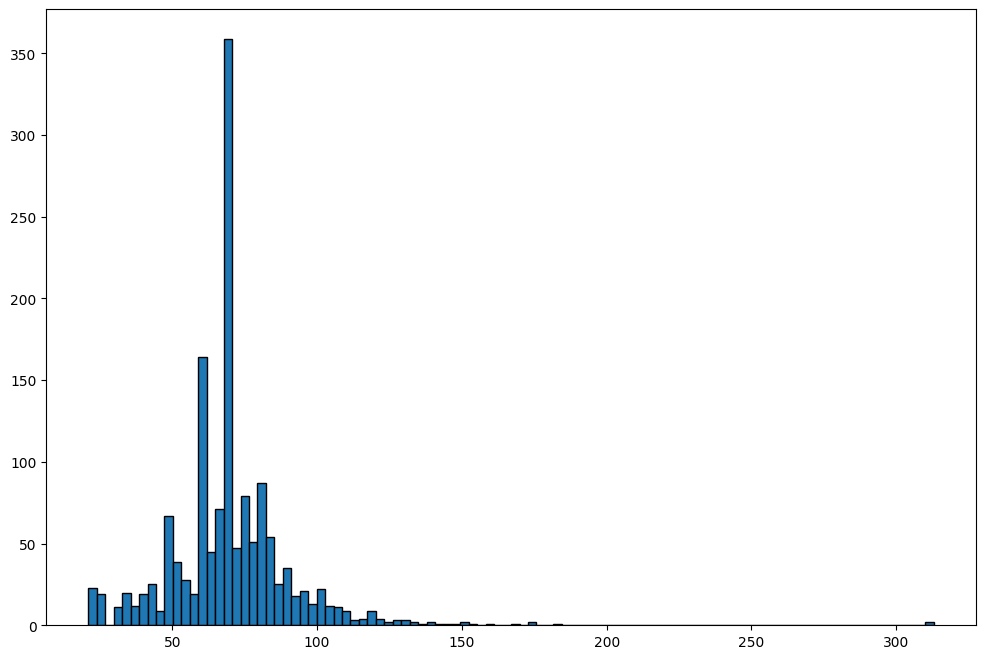

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df_train['LotFrontage'], bins=100, edgecolor='black')
plt.show()

Result :

In [ ]:
#menemukan outlier dengan batas standar deviasi sebagai ukuran sebaran data

mean = df_train['LotFrontage'].mean()
std = df_train['LotFrontage'].std()

limit = 3*std

In [ ]:
limit_atas = mean + limit
limit_bawah = mean - limit

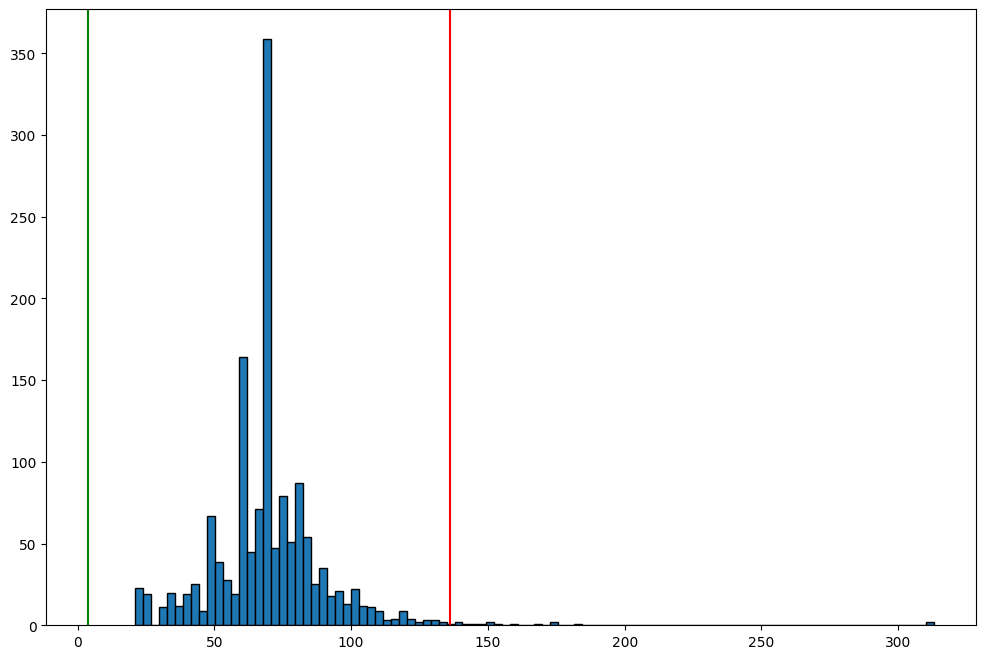

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df_train['LotFrontage'], bins=100, edgecolor='black')

ax.axvline(limit_atas, color='red')
ax.axvline(limit_bawah, color='green')
plt.show()

Berdasarkan histogram tersebut kita lihat bahwa outlier berada diluar garis vertikal merah dan hijau. Data yang ditunjukkan dengan histogram yang berada dalam garis vertikal antara garis hijau dan merah merupakan data normal.

In [ ]:
#menemukan jumlah data outlier pada kolom LotFrontage yang nilainya kurang dari batas bawah
(df_train['LotFrontage'] < limit_bawah).sum()

0

In [ ]:
#menemukan jumlah data outlier pada kolom LotFrontage yang nilainya lebih dari batas atas dan menemukan ada sebanyak 16 data yang outlier
(df_train['LotFrontage'] > limit_atas).sum()

16

In [ ]:
#Data yang tidak ada outliernya pada komlom LotFrontage
df_train = df_train[(df_train['LotFrontage'] > limit_bawah) & (df_train['LotFrontage'] < limit_atas)]
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


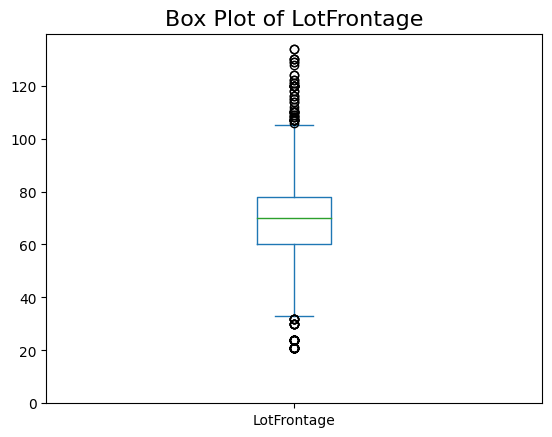

In [ ]:
import matplotlib.pyplot as plt
df_train['LotFrontage'].plot(kind='box')
plt.ylim(0)
plt.title('Box Plot of LotFrontage', size = 16)
plt.show()

Saya menggunakan 3 kali standar deviasi karena ingin menghapus outlier yang ekstrem atau yang benar-benar jauh dari nilai pada umumnya. Karena jika memakai 1.5 kali standar deviasi tentu dapat menemukan outlier yang lebih banyak jumlahnya dibandingkan 3 kali standar deviasi. Namun itu akan mempengaruhi informasi data yang ada pada dataset.

Kolom SalePrice

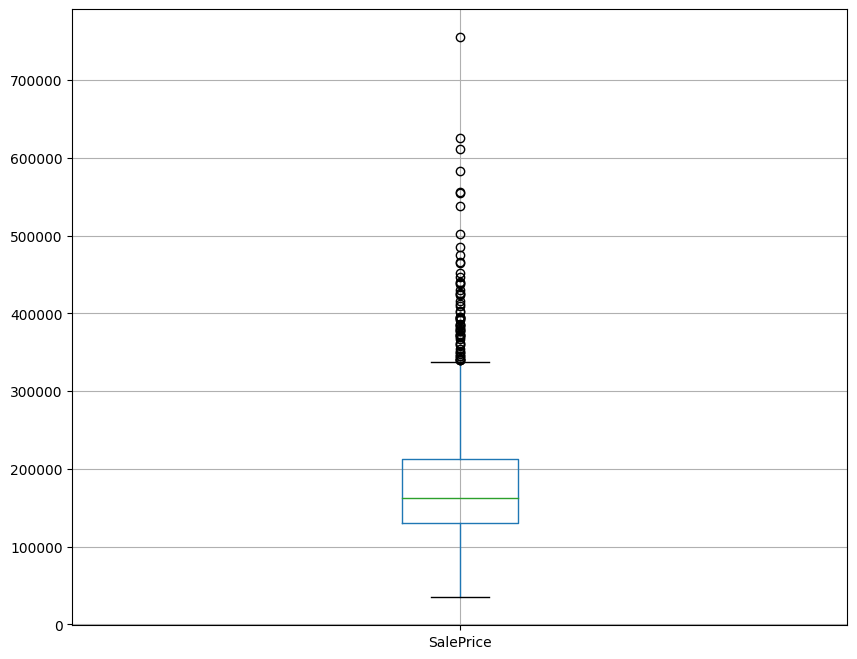

In [ ]:
plt.figure(figsize=(10,8))
df_train.boxplot(column=['SalePrice'])
plt.show()

In [ ]:
df_train['SalePrice'].unique()

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000,  82000, 160000,
       170000, 130250, 141000, 319900, 239686, 249700, 113000, 127000,
       177000, 114500, 110000, 385000, 130000, 180500, 172500, 196500,
       438780, 124900, 158000, 101000, 202500, 219500, 317000, 180000,
       226000,  80000, 225000, 244000, 185000, 144900, 107400,  91000,
       135750, 136500, 193500, 153500, 245000, 126500, 168500, 260000,
       174000, 164500,  85000, 123600, 109900,  98600, 163500, 133900,
       204750, 214000,  94750,  83000, 128950, 205000, 178000, 118964,
       198900, 169500, 100000, 115000, 190000, 136900, 383970, 217000,
       259500, 176000, 155000, 320000, 163990, 136000, 153900, 181000,
      

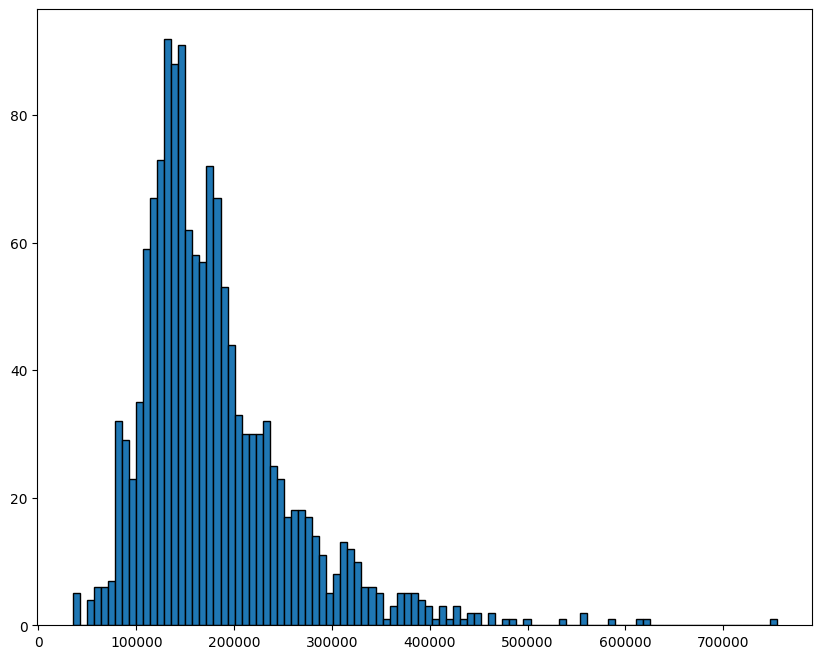

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df_train['SalePrice'], bins=100, edgecolor='black')
plt.show()

In [ ]:
df_train['SalePrice'].describe()

count      1444.000000
mean     180118.227839
std       77905.541601
min       34900.000000
25%      129900.000000
50%      162250.000000
75%      213310.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
mean = df_train['SalePrice'].mean()
std = df_train['SalePrice'].std()

limit = 3*std

In [ ]:
mean = df_train['SalePrice'].mean()
mean

180118.2278393352

In [ ]:
upper_limit = mean + limit
lower_limit = mean - limit

In [ ]:
(df_train['SalePrice'] > upper_limit).sum()

22

In [ ]:
(df_train['SalePrice'] < lower_limit).sum()

0

In [ ]:
df_train = df_train[(df_train['SalePrice'] > lower_limit) & (df_train['SalePrice'] < upper_limit)]
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


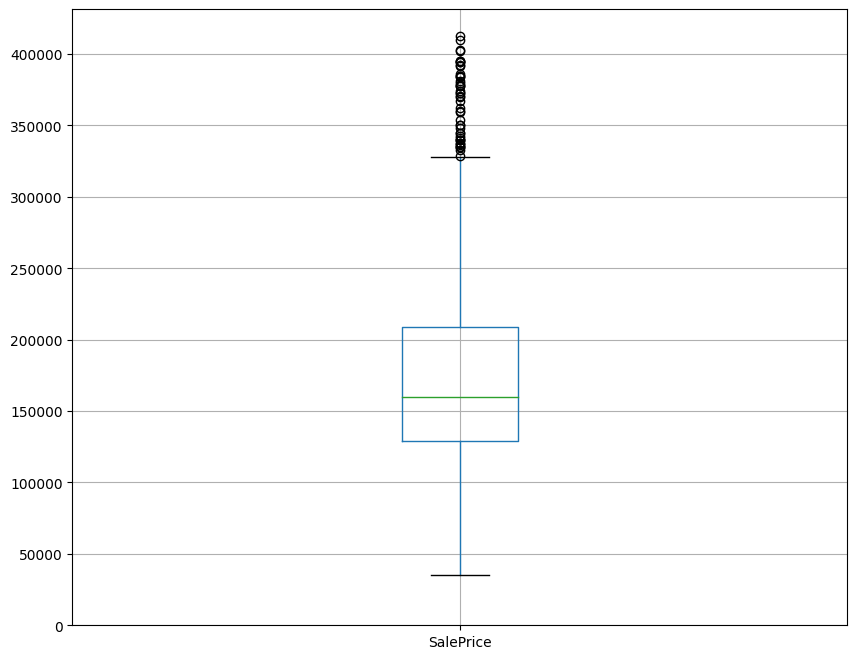

In [ ]:
plt.figure(figsize=(10,8))
df_train.boxplot(column=['SalePrice'])
plt.ylim(0)
plt.show()

Saya menggunakan 3 kali standar deviasi karena ingin menghapus outlier yang ekstrem atau yang benar-benar jauh dari nilai pada umumnya. Karena jika memakai 1.5 kali standar deviasi tentu dapat menemukan outlier yang lebih banyak jumlahnya dibandingkan 3 kali standar deviasi. Namun itu akan mempengaruhi informasi data yang ada pada dataset. Kolom SalePrice pun meskipun masih ada outlier informasi tersebut masih berharga dan masih bisa digunakan, karena terkait harga maka outlier harga tersebut bisa dijadikan ke dalam kategori dengan hargajual yang sangat mahal.

**2**. **Feature Engineering**



<ipython-input-164-81a0279b2c6a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), cmap='coolwarm', vmin=-1, vmax=1)


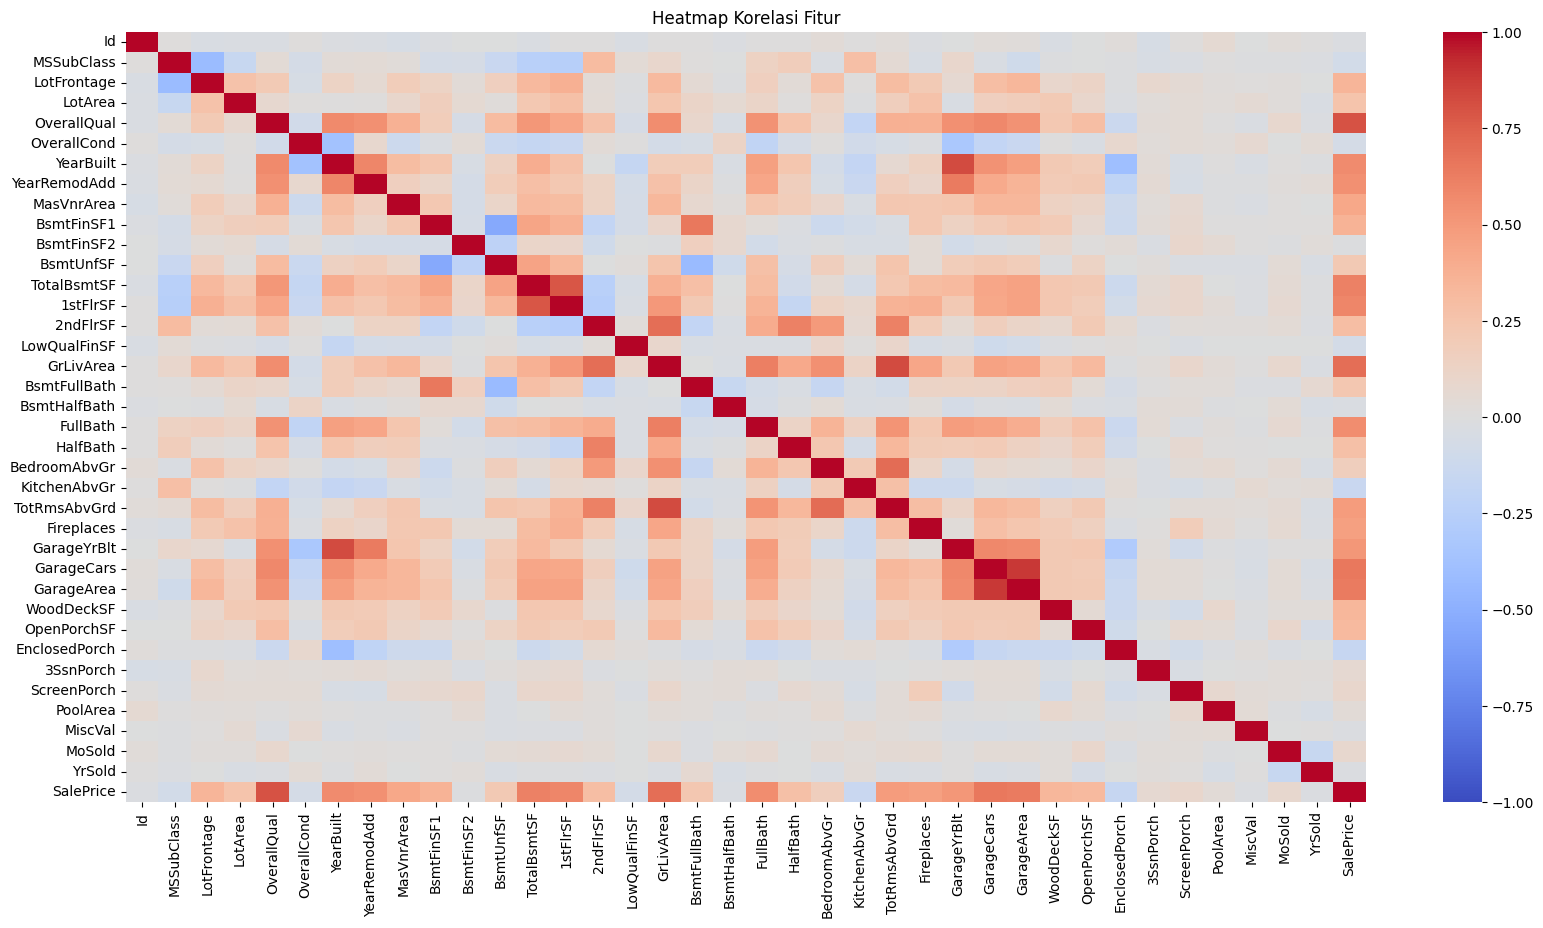

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(df_train.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [ ]:
df_train[['YearBuilt', 'YrSold']]

,YearBuilt,YrSold
0,2003,2008
1,1976,2007
2,2001,2008
3,1915,2006
4,2000,2008
...,...,...
1455,1999,2007
1456,1978,2010
1457,1941,2010
1458,1950,2010


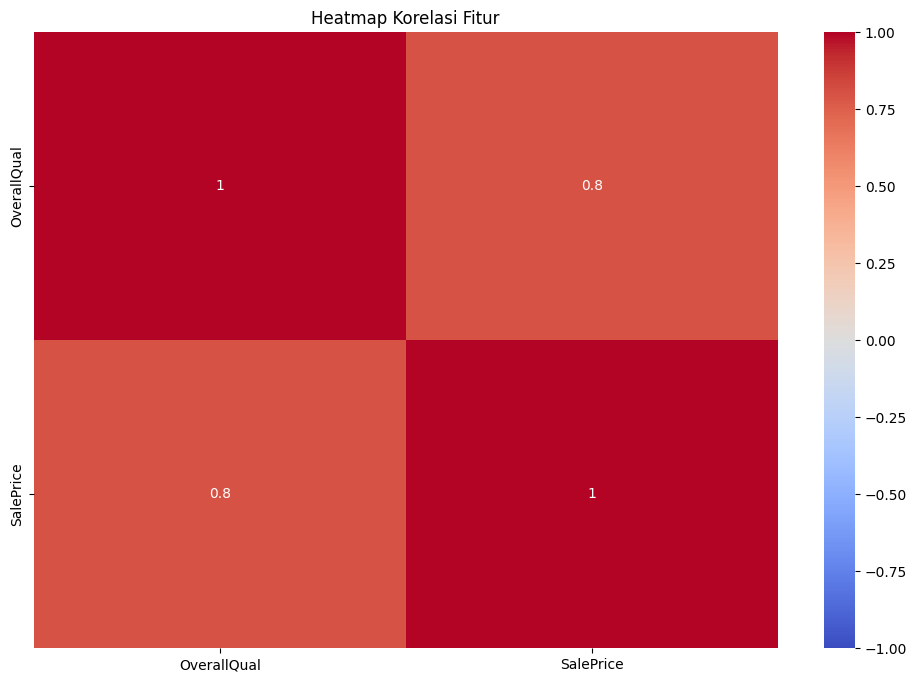

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[['OverallQual', 'SalePrice']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Fitur")
plt.show()

Fitur ke 1

In [ ]:
#Membuat fitur umur properti dari kolom tahun terjual - tahun bangunannya dibangun
df_train = df_train.assign(property_age=df_train['YrSold'] - df_train['YearBuilt'])
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,property_age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,60


In [ ]:
df_train['OverallQual'].describe()

count    1422.000000
mean        6.044304
std         1.328571
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Fitur 2

In [ ]:
#Membuat fungsi kategori kualitas berdasarkan kolom overallqual
def quality_cat(OverallQual) :
  if OverallQual <= 4 :
    return 'Low quality'
  elif OverallQual == 5 & OverallQual == 6 :
    return 'Medium quality'
  else :
    return 'High quality'

quality_cat

<function __main__.quality_cat(OverallQual)>

In [ ]:
df_train['Quality_cat'] = df_train['OverallQual'].apply(quality_cat)
df_train['Quality_cat']

0       High quality
1       High quality
2       High quality
3       High quality
4       High quality
            ...     
1455    High quality
1456    High quality
1457    High quality
1458    High quality
1459    High quality
Name: Quality_cat, Length: 1422, dtype: object

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1422 non-null   int64  
 1   MSSubClass     1422 non-null   int64  
 2   MSZoning       1422 non-null   object 
 3   LotFrontage    1422 non-null   float64
 4   LotArea        1422 non-null   int64  
 5   Street         1422 non-null   object 
 6   LotShape       1422 non-null   object 
 7   LandContour    1422 non-null   object 
 8   Utilities      1422 non-null   object 
 9   LotConfig      1422 non-null   object 
 10  LandSlope      1422 non-null   object 
 11  Neighborhood   1422 non-null   object 
 12  Condition1     1422 non-null   object 
 13  Condition2     1422 non-null   object 
 14  BldgType       1422 non-null   object 
 15  HouseStyle     1422 non-null   object 
 16  OverallQual    1422 non-null   int64  
 17  OverallCond    1422 non-null   int64  
 18  YearBuil

Fitur 3


In [ ]:
#Membuat fitur baru yaitu kategori umur pada bangunan
df_train.loc[(df_train['property_age'] <= 10), 'AgeBuilding_Cat'] = 'New Building'
df_train.loc[(df_train['property_age'] > 10) & (df_train['property_age'] <= 50 ), 'AgeBuilding_Cat'] = 'Mid Building'
df_train.loc[(df_train['property_age'] > 50 ), 'AgeBuilding_Cat'] = 'Old Building'
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,property_age,Quality_cat,AgeBuilding_Cat
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,5,High quality,New Building
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,31,High quality,Mid Building
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,7,High quality,New Building
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,91,High quality,Old Building
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,8,High quality,New Building
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,8,2007,WD,Normal,175000,8,High quality,New Building
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2010,WD,Normal,210000,32,High quality,Mid Building
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,Shed,2500,5,2010,WD,Normal,266500,69,High quality,Old Building
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,4,2010,WD,Normal,142125,60,High quality,Old Building


Fitur 4

In [ ]:
#membuat fitur baru tentang ketersediaan garasi dalam bangunan dan menentukan ukuran kecil, besarnya garasi
df_train.loc[(df_train['GarageCars'] == 0), 'GarageAvailability'] = 'No Garage'
df_train.loc[(df_train['GarageCars'] > 0) & (df_train['GarageCars'] <= 2 ), 'GarageAvailability'] = 'Small Garage'
df_train.loc[(df_train['GarageCars'] > 2 ), 'GarageAvailability'] = 'Big Garage'
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,property_age,Quality_cat,AgeBuilding_Cat,GarageAvailability
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500,5,High quality,New Building,Small Garage
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500,31,High quality,Mid Building,Small Garage
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500,7,High quality,New Building,Small Garage
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000,91,High quality,Old Building,Big Garage
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000,8,High quality,New Building,Big Garage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,8,2007,WD,Normal,175000,8,High quality,New Building,Small Garage
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2010,WD,Normal,210000,32,High quality,Mid Building,Small Garage
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2500,5,2010,WD,Normal,266500,69,High quality,Old Building,Small Garage
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,4,2010,WD,Normal,142125,60,High quality,Old Building,Small Garage


Fitur 5

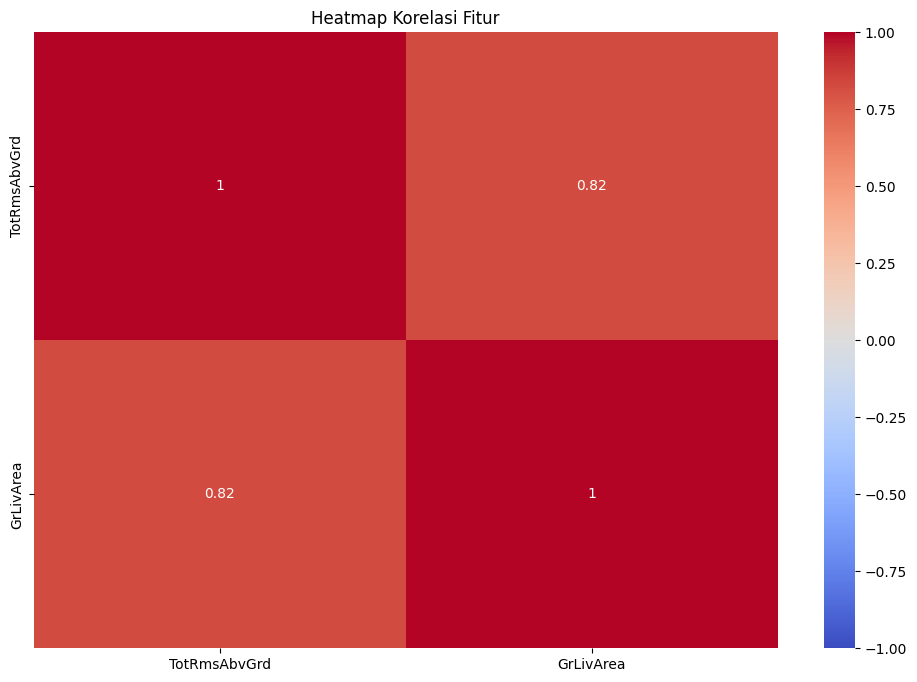

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[['TotRmsAbvGrd', 'GrLivArea']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [ ]:
#membuat fitur rata-rata luas kamar
Avgroom_size = df_train['GrLivArea'] / df_train['TotRmsAbvGrd']
Avgroom_size

0       213.750000
1       210.333333
2       297.666667
3       245.285714
4       244.222222
           ...    
1455    235.285714
1456    296.142857
1457    260.000000
1458    215.600000
1459    209.333333
Length: 1422, dtype: float64

In [ ]:
df_train = df_train.assign(Avgroom_size =df_train['GrLivArea'] / df_train['TotRmsAbvGrd'])
df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,property_age,Quality_cat,AgeBuilding_Cat,GarageAvailability,Avgroom_size
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,5,High quality,New Building,Small Garage,213.750000
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,31,High quality,Mid Building,Small Garage,210.333333
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,7,High quality,New Building,Small Garage,297.666667
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,91,High quality,Old Building,Big Garage,245.285714
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,8,High quality,New Building,Big Garage,244.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,8,2007,WD,Normal,175000,8,High quality,New Building,Small Garage,235.285714
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2,2010,WD,Normal,210000,32,High quality,Mid Building,Small Garage,296.142857
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,5,2010,WD,Normal,266500,69,High quality,Old Building,Small Garage,260.000000
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,4,2010,WD,Normal,142125,60,High quality,Old Building,Small Garage,215.600000


Fitur 6

In [ ]:
#membuat fitur rata-rata luas garasi untuk menampung mobil
df_train = df_train.assign(AvgCarsSize_Garage =df_train['GarageArea'] / df_train['GarageCars'])
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,property_age,Quality_cat,AgeBuilding_Cat,GarageAvailability,Avgroom_size,AvgCarsSize_Garage
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,5,High quality,New Building,Small Garage,213.750000,274.000000
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,31,High quality,Mid Building,Small Garage,210.333333,230.000000
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,7,High quality,New Building,Small Garage,297.666667,304.000000
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,91,High quality,Old Building,Big Garage,245.285714,214.000000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,8,High quality,New Building,Big Garage,244.222222,278.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,8,High quality,New Building,Small Garage,235.285714,230.000000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,32,High quality,Mid Building,Small Garage,296.142857,250.000000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,69,High quality,Old Building,Small Garage,260.000000,252.000000
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,142125,60,High quality,Old Building,Small Garage,215.600000,240.000000


Fitur 7

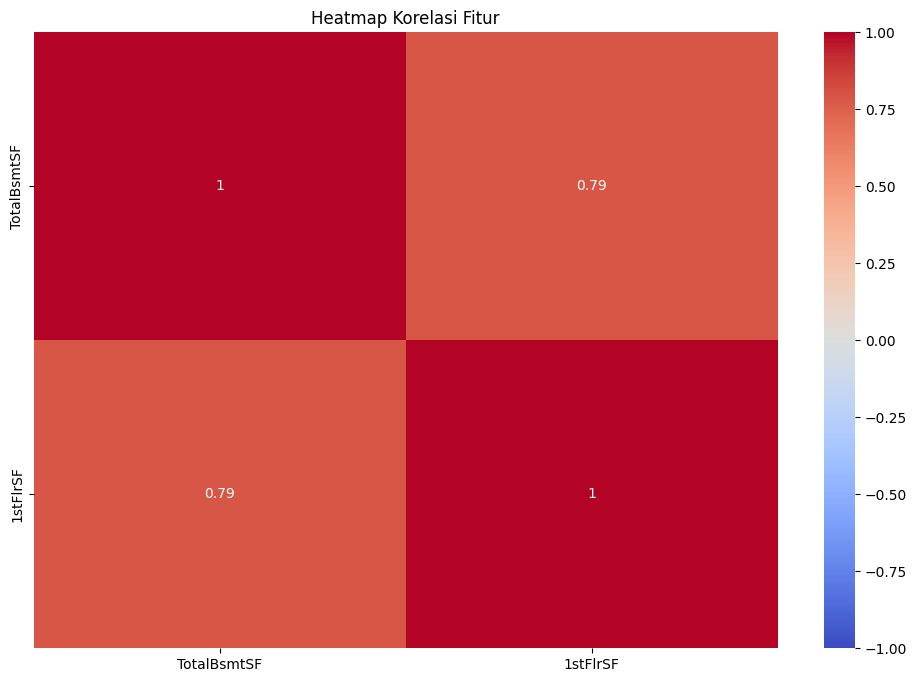

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[['TotalBsmtSF', '1stFlrSF']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [ ]:
#Membuat fitur total luas bangunan
df_train = df_train.assign(TotalBuildingArea =df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['TotalBsmtSF'])
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,property_age,Quality_cat,AgeBuilding_Cat,GarageAvailability,Avgroom_size,AvgCarsSize_Garage,TotalBuildingArea
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,5,High quality,New Building,Small Garage,213.750000,274.000000,2566
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,31,High quality,Mid Building,Small Garage,210.333333,230.000000,2524
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,7,High quality,New Building,Small Garage,297.666667,304.000000,2706
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,WD,Abnorml,140000,91,High quality,Old Building,Big Garage,245.285714,214.000000,2473
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,8,High quality,New Building,Big Garage,244.222222,278.666667,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,WD,Normal,175000,8,High quality,New Building,Small Garage,235.285714,230.000000,2600
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,WD,Normal,210000,32,High quality,Mid Building,Small Garage,296.142857,250.000000,3615
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,WD,Normal,266500,69,High quality,Old Building,Small Garage,260.000000,252.000000,3492
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,WD,Normal,142125,60,High quality,Old Building,Small Garage,215.600000,240.000000,2156


Fitur 8

In [ ]:
df_train['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1422, dtype: int64

In [ ]:
#Membuat fitur apakah bangunan/property tersebut mempunyai sebuah kolam renang
df_train['poolAvailability'] = df_train['PoolArea'].apply(lambda x: 1 if x >= 1 else 0)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,property_age,Quality_cat,AgeBuilding_Cat,GarageAvailability,Avgroom_size,AvgCarsSize_Garage,TotalBuildingArea,poolAvailability
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,Normal,208500,5,High quality,New Building,Small Garage,213.750000,274.000000,2566,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,Normal,181500,31,High quality,Mid Building,Small Garage,210.333333,230.000000,2524,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,Normal,223500,7,High quality,New Building,Small Garage,297.666667,304.000000,2706,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,Abnorml,140000,91,High quality,Old Building,Big Garage,245.285714,214.000000,2473,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,Normal,250000,8,High quality,New Building,Big Garage,244.222222,278.666667,3343,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,Normal,175000,8,High quality,New Building,Small Garage,235.285714,230.000000,2600,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,Normal,210000,32,High quality,Mid Building,Small Garage,296.142857,250.000000,3615,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,Normal,266500,69,High quality,Old Building,Small Garage,260.000000,252.000000,3492,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,Normal,142125,60,High quality,Old Building,Small Garage,215.600000,240.000000,2156,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1422 non-null   int64  
 1   MSSubClass          1422 non-null   int64  
 2   MSZoning            1422 non-null   object 
 3   LotFrontage         1422 non-null   float64
 4   LotArea             1422 non-null   int64  
 5   Street              1422 non-null   object 
 6   LotShape            1422 non-null   object 
 7   LandContour         1422 non-null   object 
 8   Utilities           1422 non-null   object 
 9   LotConfig           1422 non-null   object 
 10  LandSlope           1422 non-null   object 
 11  Neighborhood        1422 non-null   object 
 12  Condition1          1422 non-null   object 
 13  Condition2          1422 non-null   object 
 14  BldgType            1422 non-null   object 
 15  HouseStyle          1422 non-null   object 
 16  Overal

FITUR 9

In [ ]:
#Membuat fungsi kategori kualitas material
def ExtQual_cat(ExterQual) :
  if ExterQual == 'Ex' :
    return 5
  elif ExterQual == 'Gd'  :
    return 4
  elif ExterQual == 'TA'  :
    return 3
  elif ExterQual == 'Fa'  :
    return 2
  elif ExterQual == 'Po'  :
    return 1
  else :
    return ExterQual

ExtQual_cat

<function __main__.ExtQual_cat(ExterQual)>

In [ ]:
df_train['ExtQual_cat'] = df_train['ExterQual'].apply(ExtQual_cat)
df_train['ExtQual_cat']

0       4
1       3
2       4
3       3
4       4
       ..
1455    3
1456    3
1457    5
1458    3
1459    4
Name: ExtQual_cat, Length: 1422, dtype: int64

fitur 10

In [ ]:
#Membuat fitur total luas kaki persegi pada tipe 1 dan 2
df_train['Total_FinishedSquareFeet'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,property_age,Quality_cat,AgeBuilding_Cat,GarageAvailability,Avgroom_size,AvgCarsSize_Garage,TotalBuildingArea,poolAvailability,ExtQual_cat,Total_FinishedSquareFeet
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,5,High quality,New Building,Small Garage,213.750000,274.000000,2566,0,4,706
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,31,High quality,Mid Building,Small Garage,210.333333,230.000000,2524,0,3,978
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,7,High quality,New Building,Small Garage,297.666667,304.000000,2706,0,4,486
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,91,High quality,Old Building,Big Garage,245.285714,214.000000,2473,0,3,216
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,8,High quality,New Building,Big Garage,244.222222,278.666667,3343,0,4,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,8,High quality,New Building,Small Garage,235.285714,230.000000,2600,0,3,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,32,High quality,Mid Building,Small Garage,296.142857,250.000000,3615,0,3,953
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,69,High quality,Old Building,Small Garage,260.000000,252.000000,3492,0,5,275
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,60,High quality,Old Building,Small Garage,215.600000,240.000000,2156,0,3,1078


**EDA**

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MoSold,YrSold,SalePrice,property_age,Avgroom_size,AvgCarsSize_Garage,TotalBuildingArea,poolAvailability,ExtQual_cat,Total_FinishedSquareFeet
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1415.000000,1422.000000,...,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1343.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,730.810127,57.243319,68.619550,10141.949367,6.044304,5.583685,1970.838959,1984.500000,97.710954,427.959916,...,6.338256,2007.816456,175203.867792,36.977496,229.635452,271.666418,2519.769339,0.002813,3.373418,473.836850
std,422.259109,42.678147,18.156858,8205.464726,1.328571,1.117811,30.095580,20.641327,168.300497,420.125616,...,2.701721,1.324562,66834.855016,30.144611,43.297166,63.155671,726.264321,0.052981,0.551828,440.813998
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,1.000000,2006.000000,34900.000000,0.000000,120.000000,120.000000,334.000000,0.000000,2.000000,0.000000
25%,366.250000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,5.000000,2007.000000,129125.000000,8.000000,198.035714,233.583333,2000.250000,0.000000,3.000000,0.000000
50%,730.500000,50.000000,70.000000,9362.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,378.000000,...,6.000000,2008.000000,160000.000000,36.000000,225.773810,264.000000,2456.000000,0.000000,3.000000,459.500000
75%,1093.750000,70.000000,78.000000,11361.750000,7.000000,6.000000,2000.000000,2003.000000,160.000000,697.750000,...,8.000000,2009.000000,208900.000000,55.000000,254.427083,294.000000,2975.250000,0.000000,4.000000,780.000000
max,1460.000000,190.000000,134.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,12.000000,2010.000000,412500.000000,136.000000,426.400000,924.000000,7814.000000,1.000000,5.000000,2260.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1422 non-null   int64  
 1   MSSubClass                1422 non-null   int64  
 2   MSZoning                  1422 non-null   object 
 3   LotFrontage               1422 non-null   float64
 4   LotArea                   1422 non-null   int64  
 5   Street                    1422 non-null   object 
 6   LotShape                  1422 non-null   object 
 7   LandContour               1422 non-null   object 
 8   Utilities                 1422 non-null   object 
 9   LotConfig                 1422 non-null   object 
 10  LandSlope                 1422 non-null   object 
 11  Neighborhood              1422 non-null   object 
 12  Condition1                1422 non-null   object 
 13  Condition2                1422 non-null   object 
 14  BldgType

<ipython-input-188-68d86616aed2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), cmap='coolwarm', vmin=-1, vmax=1)


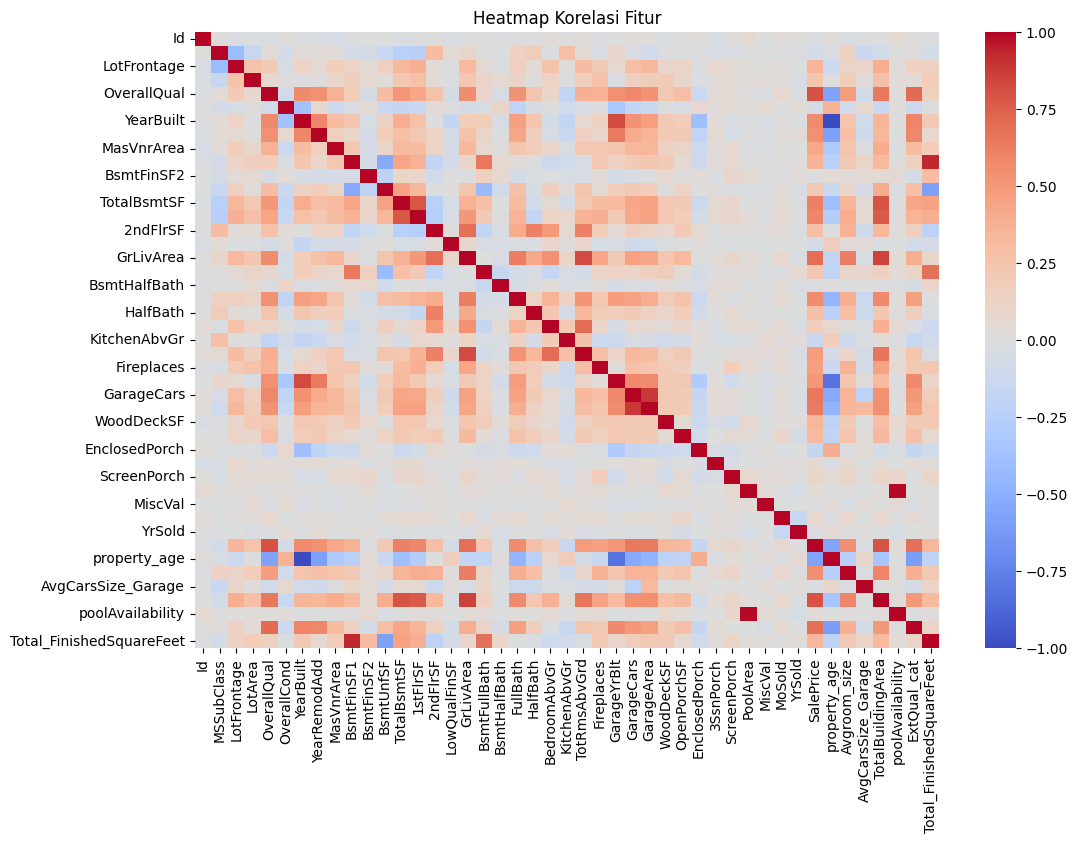

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Fitur")
plt.show()

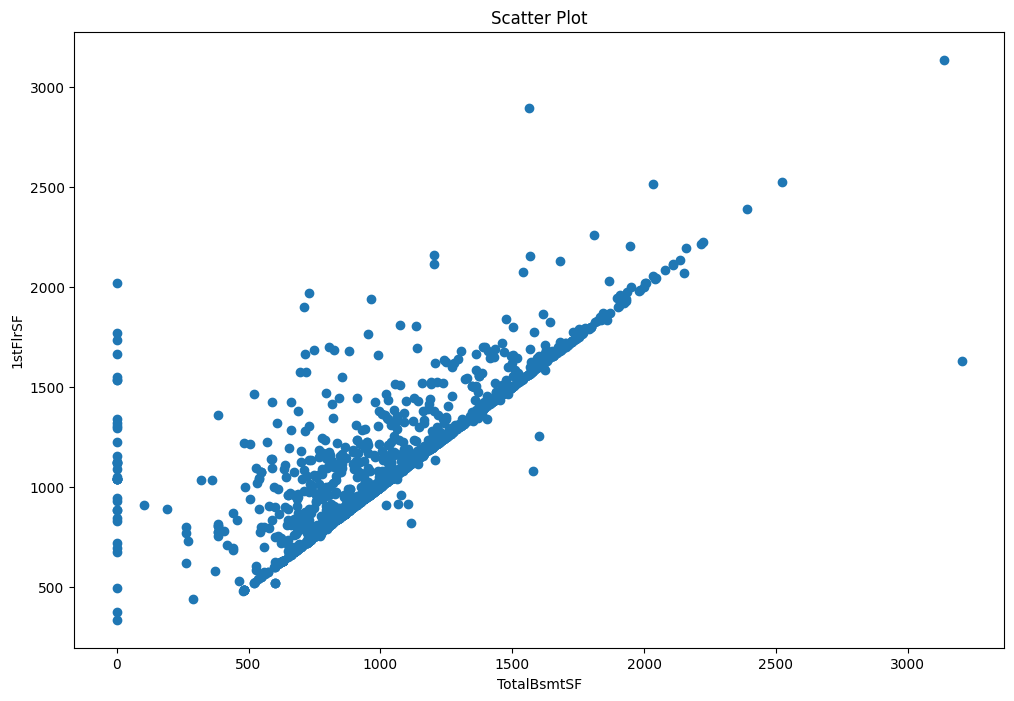

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df_train['TotalBsmtSF'], df_train['1stFlrSF'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('1stFlrSF')
plt.title('Scatter Plot')
plt.show()

### **Modelling**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import warnings

<ipython-input-191-9d173ddda513>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = df_train.corr()


<Axes: >

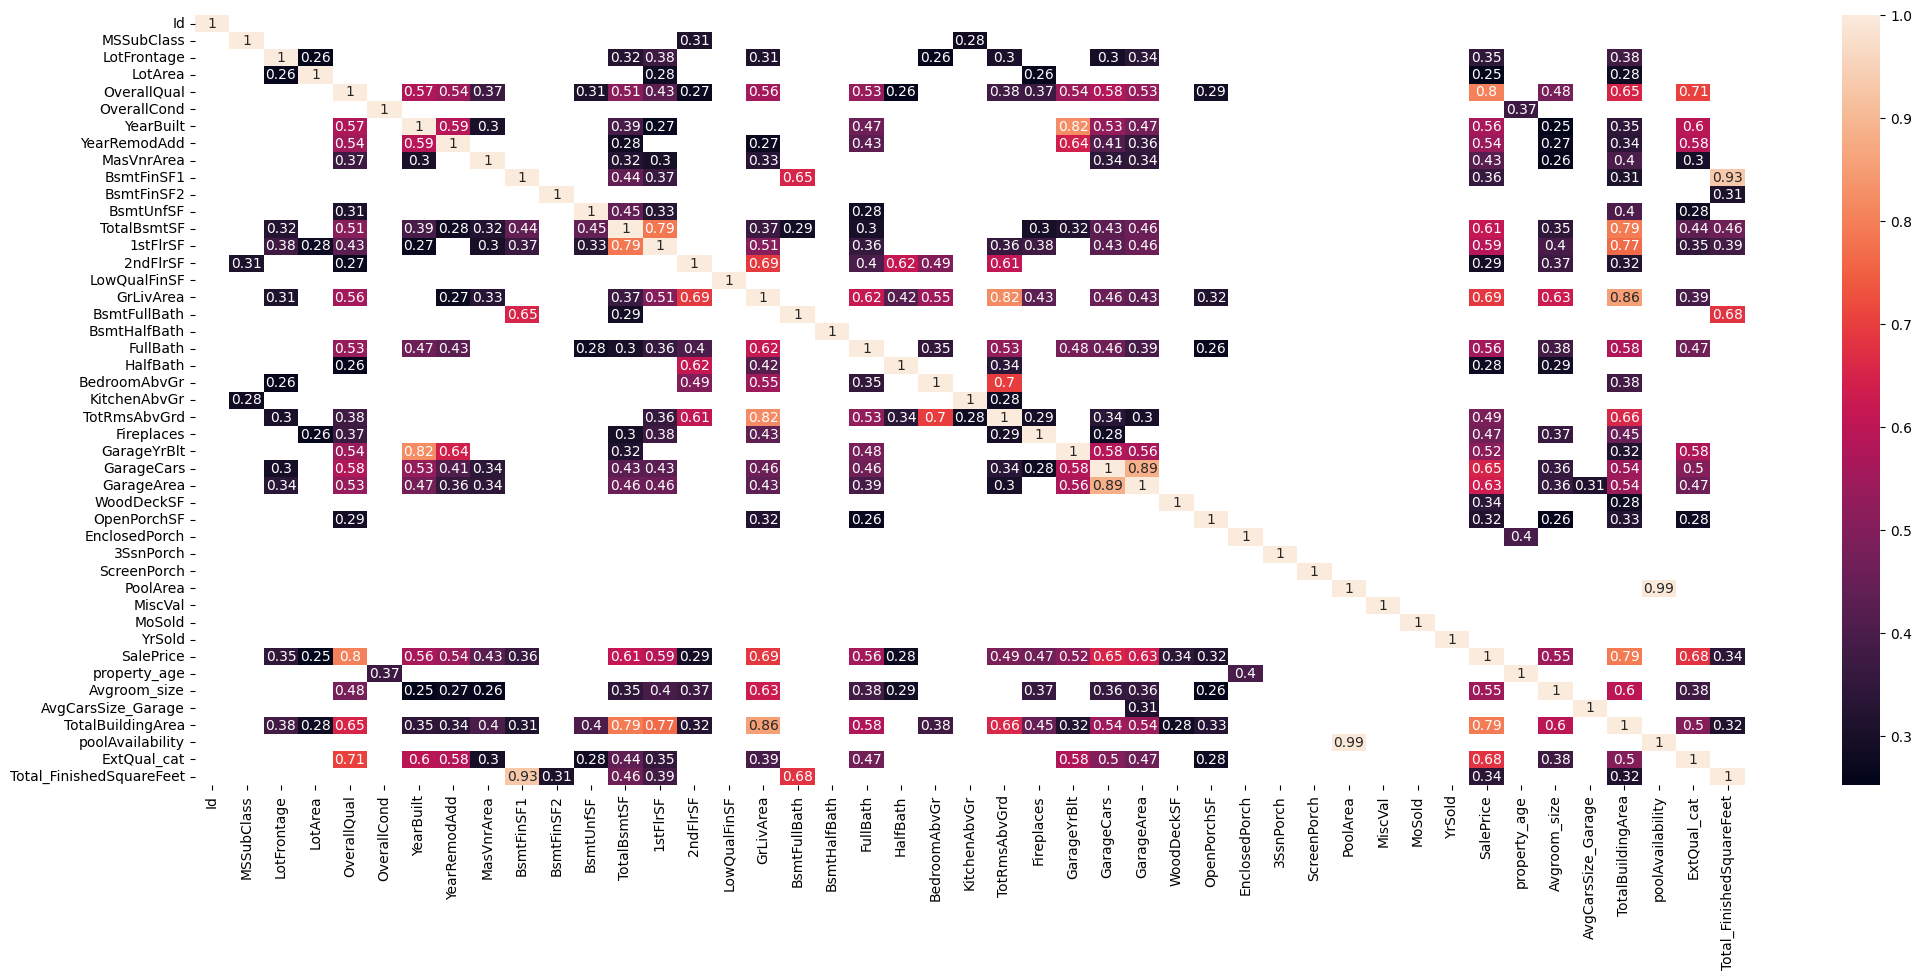

In [ ]:
korelasi = df_train.corr()
minkor = korelasi[korelasi > 0.25]
plt.figure(figsize=(25, 10))
sns.heatmap(minkor, annot=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1422 non-null   int64  
 1   MSSubClass                1422 non-null   int64  
 2   MSZoning                  1422 non-null   object 
 3   LotFrontage               1422 non-null   float64
 4   LotArea                   1422 non-null   int64  
 5   Street                    1422 non-null   object 
 6   LotShape                  1422 non-null   object 
 7   LandContour               1422 non-null   object 
 8   Utilities                 1422 non-null   object 
 9   LotConfig                 1422 non-null   object 
 10  LandSlope                 1422 non-null   object 
 11  Neighborhood              1422 non-null   object 
 12  Condition1                1422 non-null   object 
 13  Condition2                1422 non-null   object 
 14  BldgType

In [ ]:
df_train = df_train.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1422 non-null   int64  
 1   MSSubClass                1422 non-null   int64  
 2   MSZoning                  1422 non-null   object 
 3   LotFrontage               1422 non-null   float64
 4   LotArea                   1422 non-null   int64  
 5   Street                    1422 non-null   object 
 6   LotShape                  1422 non-null   object 
 7   LandContour               1422 non-null   object 
 8   Utilities                 1422 non-null   object 
 9   LotConfig                 1422 non-null   object 
 10  LandSlope                 1422 non-null   object 
 11  Neighborhood              1422 non-null   object 
 12  Condition1                1422 non-null   object 
 13  Condition2                1422 non-null   object 
 14  BldgType

In [ ]:
missing_values_count = df_train.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(columns_with_missing_values)


MasVnrType             7
MasVnrArea             7
BsmtCond              37
BsmtExposure          38
BsmtFinType1          37
BsmtFinType2          38
Electrical             1
GarageType            79
GarageYrBlt           79
GarageFinish          79
GarageQual            79
GarageCond            79
AvgCarsSize_Garage    79
dtype: int64


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1422 non-null   int64  
 1   MSSubClass                1422 non-null   int64  
 2   MSZoning                  1422 non-null   object 
 3   LotFrontage               1422 non-null   float64
 4   LotArea                   1422 non-null   int64  
 5   Street                    1422 non-null   object 
 6   LotShape                  1422 non-null   object 
 7   LandContour               1422 non-null   object 
 8   Utilities                 1422 non-null   object 
 9   LotConfig                 1422 non-null   object 
 10  LandSlope                 1422 non-null   object 
 11  Neighborhood              1422 non-null   object 
 12  Condition1                1422 non-null   object 
 13  Condition2                1422 non-null   object 
 14  BldgType

In [ ]:
df = df_train.dropna()

In [ ]:
col = ['ExterQual', 'ExterCond', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for i in col :
  df[i].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace=True)

df['BsmtExposure'].replace(['Gd', 'Av', 'Mn', 'No', 'NA'], [4,3,2,1,0], inplace=True)

df['CentralAir'].replace(['Y', 'N'], [1,0], inplace=True)

df[['ExterQual', 'ExterCond', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'BsmtExposure', 'CentralAir']].head(10)



<ipython-input-198-e89f84ba4fdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace=True)
<ipython-input-198-e89f84ba4fdd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtExposure'].replace(['Gd', 'Av', 'Mn', 'No', 'NA'], [4,3,2,1,0], inplace=True)
<ipython-input-198-e89f84ba4fdd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CentralAir'].replace([

,ExterQual,ExterCond,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,BsmtExposure,CentralAir
0,4,3,3,5,4,3,3,1,1
1,3,3,3,5,3,3,3,4,1
2,4,3,3,5,4,3,3,2,1
3,3,3,4,4,4,3,3,1,1
4,4,3,3,5,4,3,3,3,1
5,3,3,3,5,3,3,3,1,1
6,4,3,3,5,4,3,3,3,1
7,3,3,3,5,3,3,3,2,1
8,3,3,3,4,3,2,3,1,1
9,3,3,3,5,3,4,3,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1303 non-null   int64  
 1   MSSubClass                1303 non-null   int64  
 2   MSZoning                  1303 non-null   object 
 3   LotFrontage               1303 non-null   float64
 4   LotArea                   1303 non-null   int64  
 5   Street                    1303 non-null   object 
 6   LotShape                  1303 non-null   object 
 7   LandContour               1303 non-null   object 
 8   Utilities                 1303 non-null   object 
 9   LotConfig                 1303 non-null   object 
 10  LandSlope                 1303 non-null   object 
 11  Neighborhood              1303 non-null   object 
 12  Condition1                1303 non-null   object 
 13  Condition2                1303 non-null   object 
 14  BldgType

In [ ]:
df.select_dtypes(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Quality_cat,AgeBuilding_Cat,GarageAvailability
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,High quality,New Building,Small Garage
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,High quality,Mid Building,Small Garage
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,High quality,New Building,Small Garage
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml,High quality,Old Building,Big Garage
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,High quality,New Building,Big Garage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,High quality,New Building,Small Garage
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,Min1,Attchd,Unf,Y,WD,Normal,High quality,Mid Building,Small Garage
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,High quality,Old Building,Small Garage
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Typ,Attchd,Unf,Y,WD,Normal,High quality,Old Building,Small Garage


In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
col = df.select_dtypes(include='object')
for j in col :
  df[j] = label.fit_transform(df[i])

<ipython-input-201-4f7d02fb16c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j] = label.fit_transform(df[i])
<ipython-input-201-4f7d02fb16c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j] = label.fit_transform(df[i])
<ipython-input-201-4f7d02fb16c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1303 non-null   int64  
 1   MSSubClass                1303 non-null   int64  
 2   MSZoning                  1303 non-null   int64  
 3   LotFrontage               1303 non-null   float64
 4   LotArea                   1303 non-null   int64  
 5   Street                    1303 non-null   int64  
 6   LotShape                  1303 non-null   int64  
 7   LandContour               1303 non-null   int64  
 8   Utilities                 1303 non-null   int64  
 9   LotConfig                 1303 non-null   int64  
 10  LandSlope                 1303 non-null   int64  
 11  Neighborhood              1303 non-null   int64  
 12  Condition1                1303 non-null   int64  
 13  Condition2                1303 non-null   int64  
 14  BldgType

In [ ]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(columns_with_missing_values)


Series([], dtype: int64)


In [ ]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (912, 85)
Testing Set - X_test shape: (391, 85)
Training Set - y_train shape: (912,)
Testing Set - y_test shape: (391,)


In [ ]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model RandomForestRegressor")
print("MSE:", mse_rf)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Model RandomForestRegressor
MSE: 553892189.8807545
Mean Absolute Error: 16484.65186700767
R-squared: 0.8752936685435373


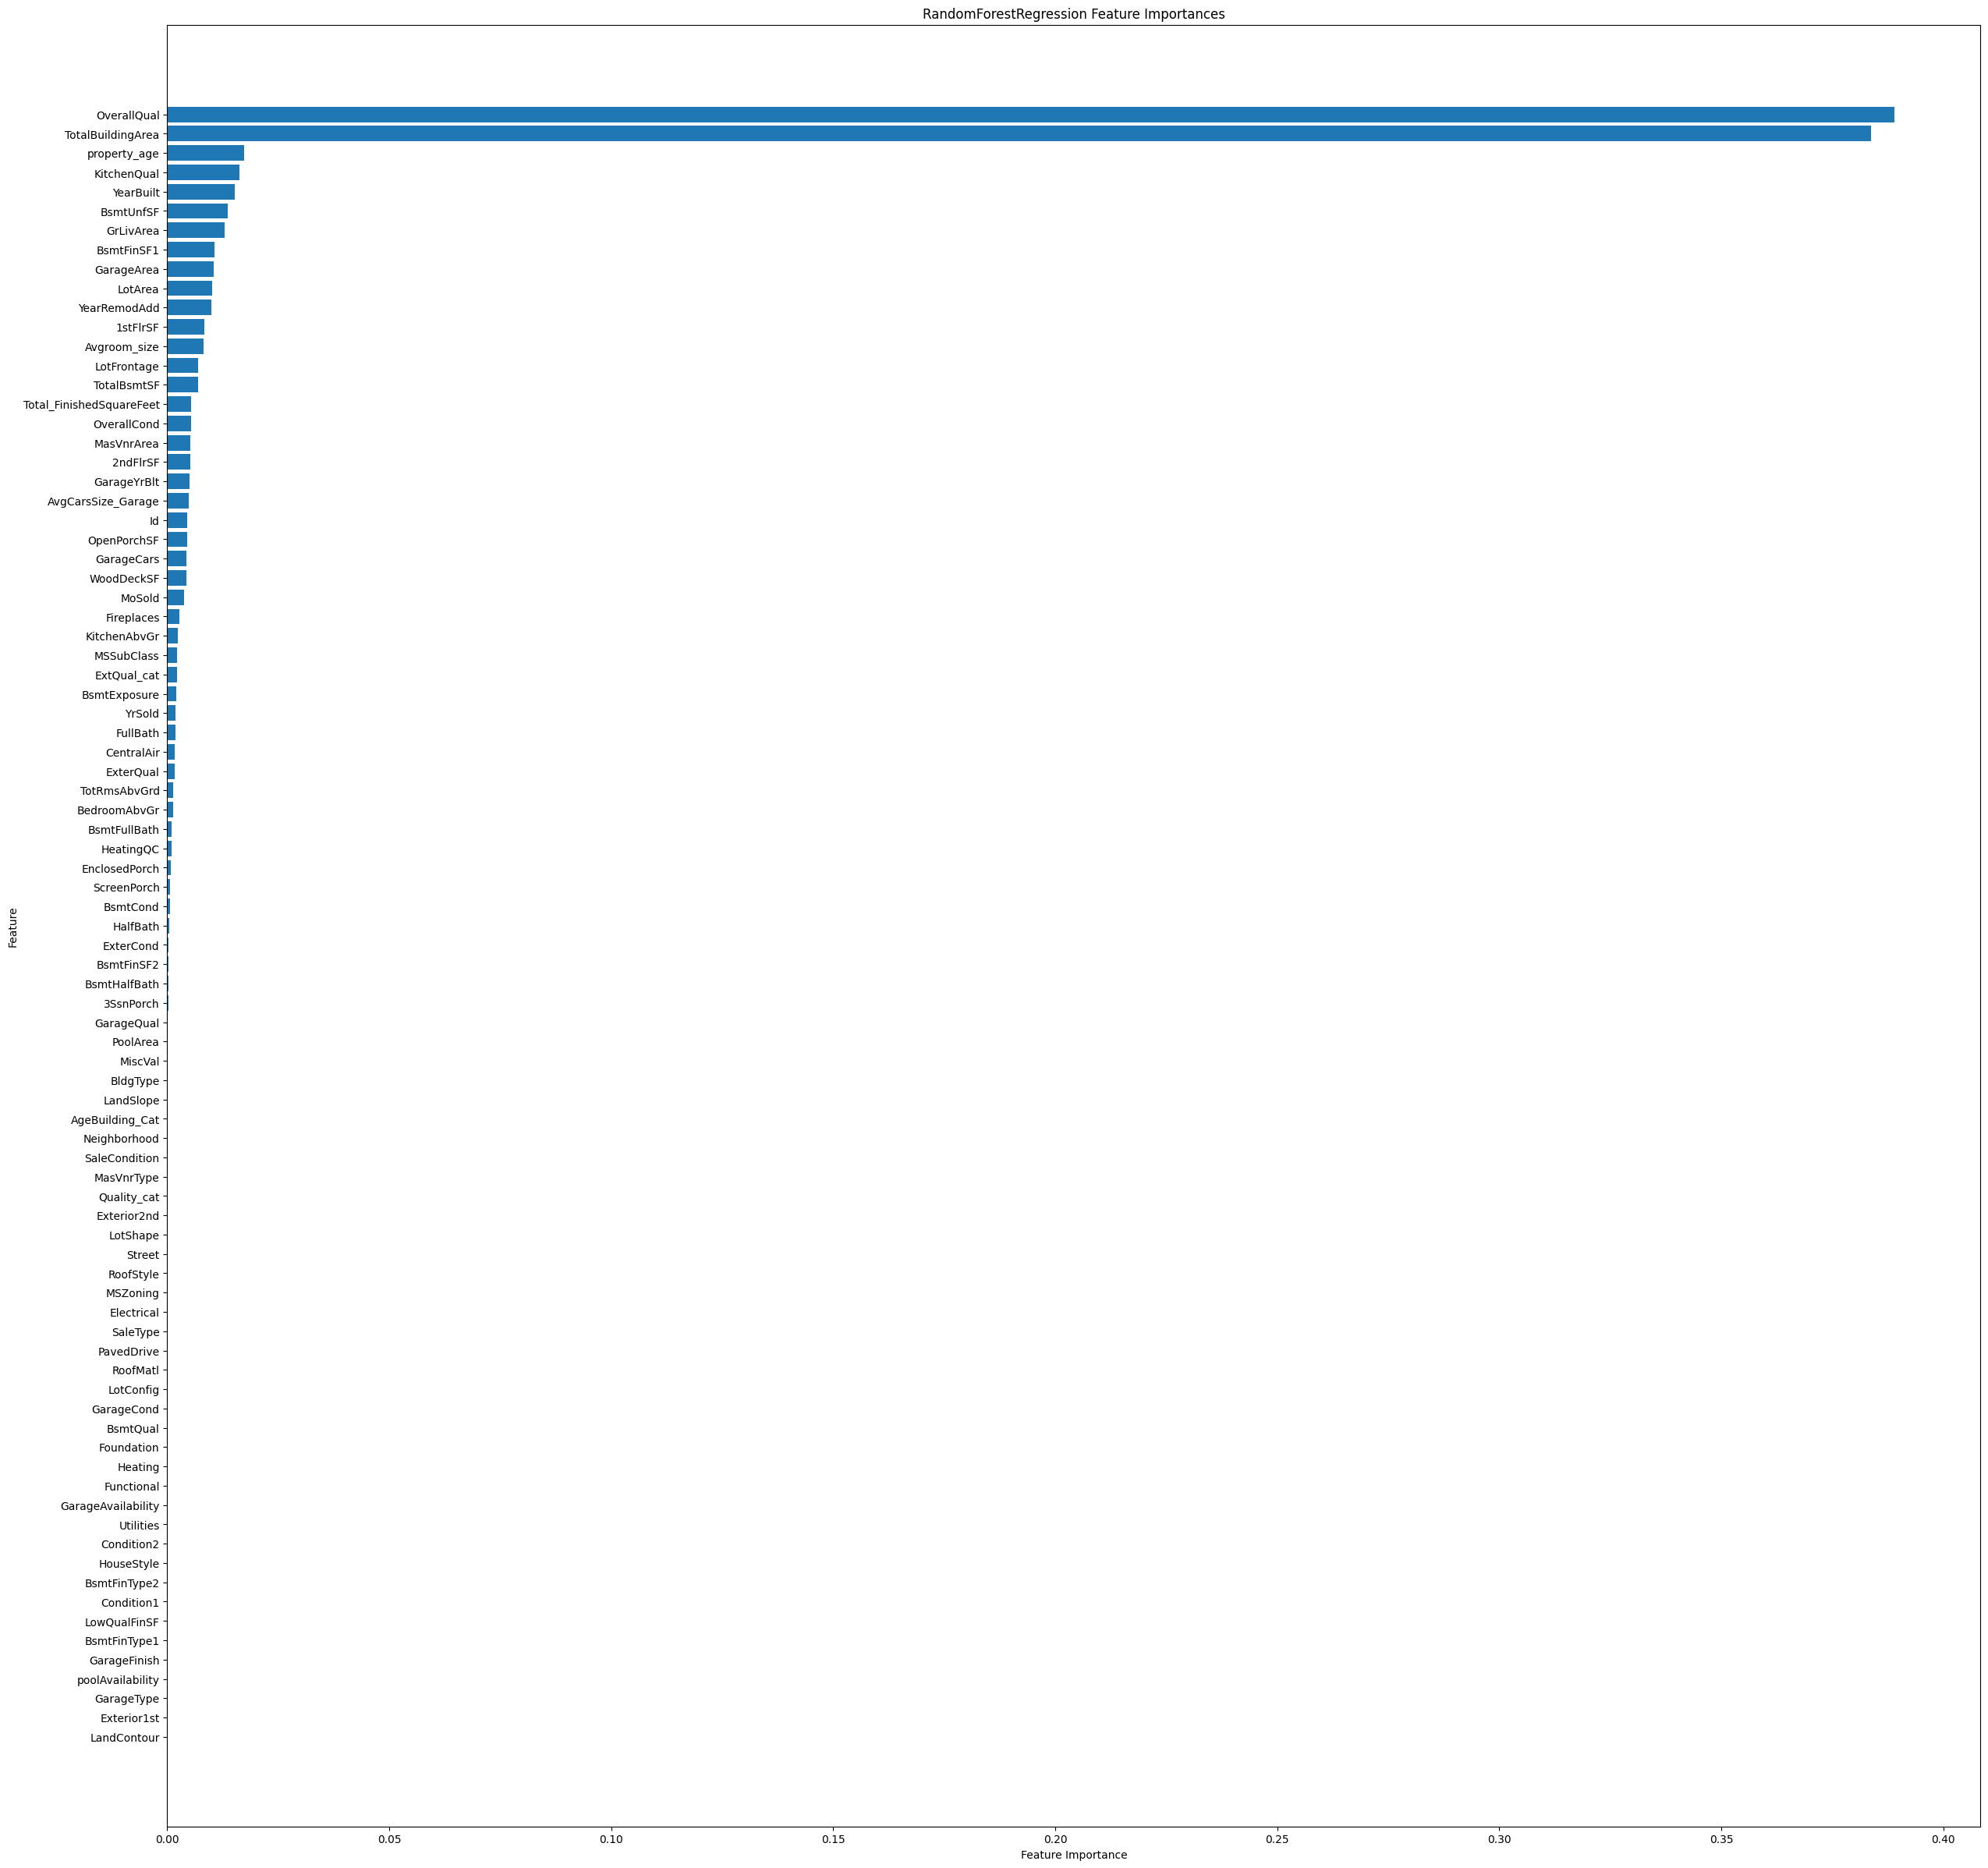

In [ ]:
feature_importances1 = rfr.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances1)

plt.figure(figsize=(30, 30))
plt.barh(range(len(sorted_indices)), feature_importances1[sorted_indices])
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('RandomForestRegression Feature Importances')
plt.show()

In [ ]:
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred2=xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("Model XGBOOSTRegressor")
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Model XGBOOSTRegressor
Mean Absolute Error: 17018.64591991688
R-squared: 0.867541317729223


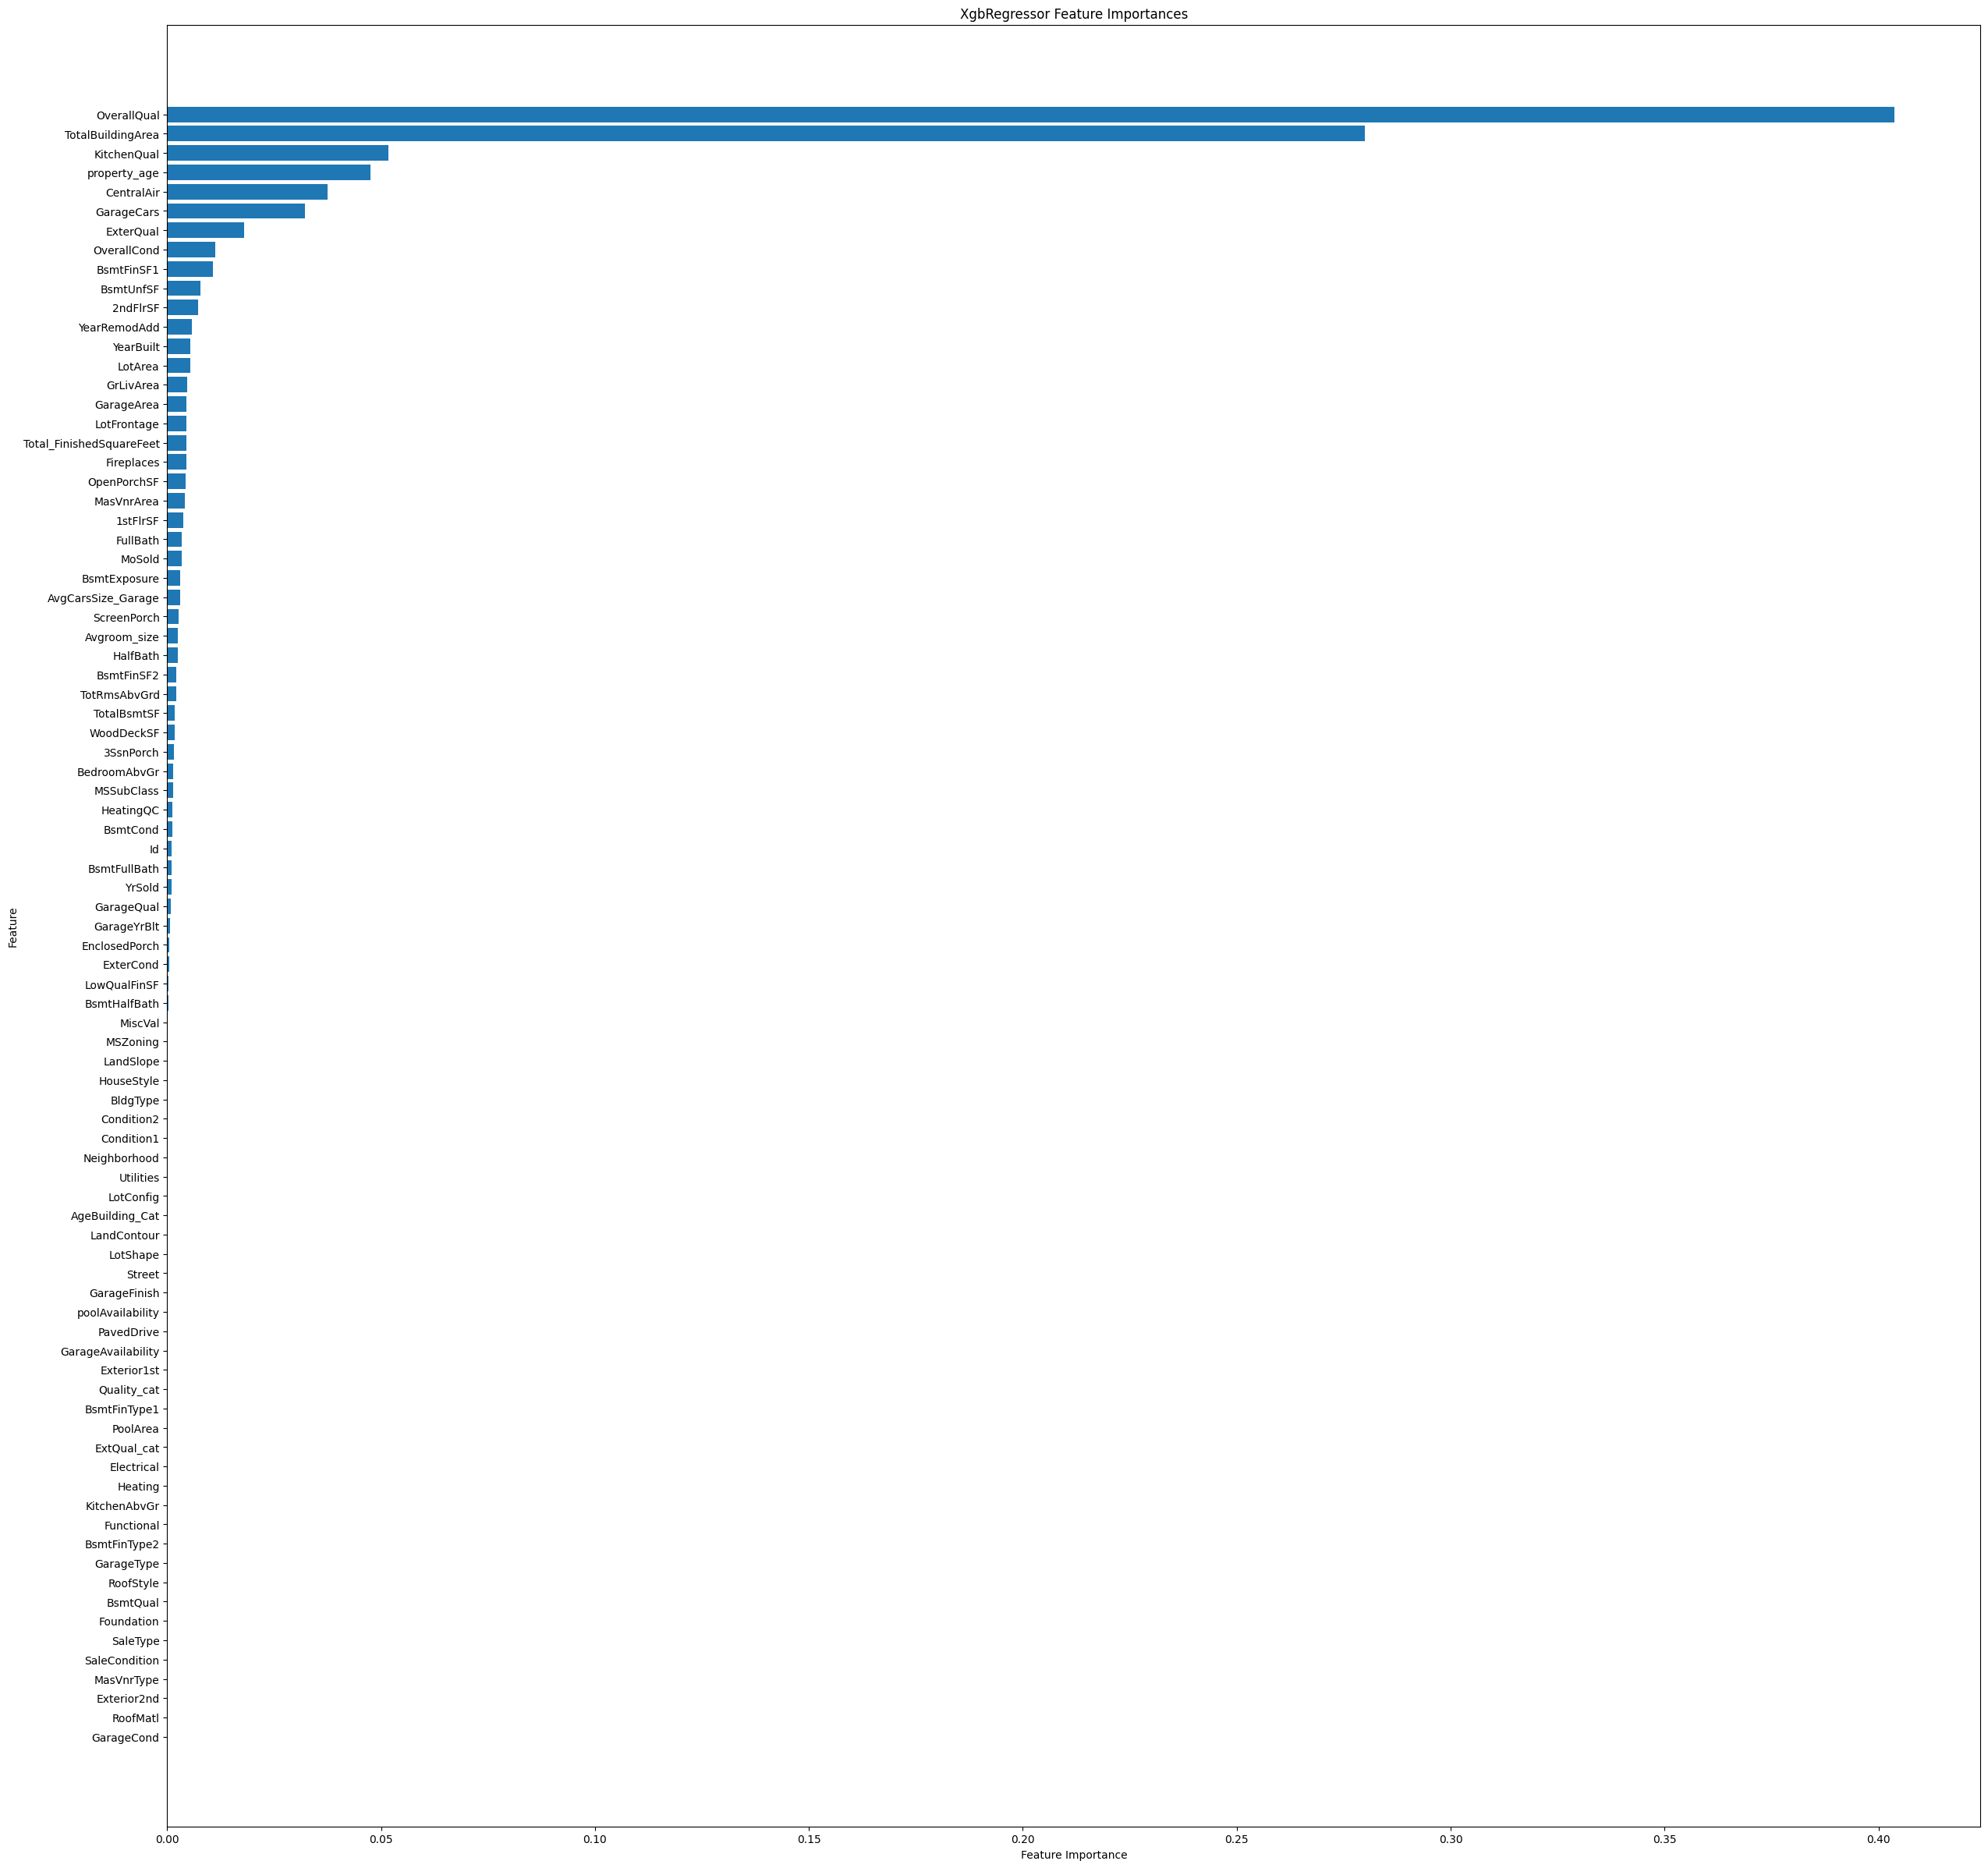

In [ ]:
feature_importances2 = xgb.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances2)

plt.figure(figsize=(30, 30))
plt.barh(range(len(sorted_indices)), feature_importances2[sorted_indices])
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XgbRegressor Feature Importances')
plt.show()

In [ ]:
X_Select=df[['OverallQual', 'TotalBuildingArea', 'property_age', 'KitchenQual', 'YearBuilt', 'CentralAir', 'GarageCars', 'GrLivArea', 'ExterQual', 'BsmtUnfSF']]
scaler = MinMaxScaler()
X= scaler.fit_transform(X_Select)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (912, 10)
Testing Set - X_test shape: (391, 10)
Training Set - y_train shape: (912,)
Testing Set - y_test shape: (391,)


In [ ]:
model1=RandomForestRegressor()
model1.fit(X_train,y_train)

y_pred_rfr=model1.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)
print("Model RandomForestRegressor")
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Model RandomForestRegressor
Mean Absolute Error: 17138.58369017172
R-squared: 0.8661066929947783


In [ ]:
model2 = XGBRegressor()
model2.fit(X_train, y_train)

y_xgb_pred=model2.predict(X_test)
mae = mean_absolute_error(y_test, y_xgb_pred)
r2 = r2_score(y_test, y_xgb_pred)
print("Model XGBoostRegressor")
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Model XGBoostRegressor
Mean Absolute Error: 18556.608316016624
R-squared: 0.8439533384716409


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import linear_model, tree, ensemble

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_dt_pred=dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_dt_pred)
r2 = r2_score(y_test, y_dt_pred)
print("Model DecisionTreeRegressor")
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Model DecisionTreeRegressor
Mean Absolute Error: 22202.649616368286
R-squared: 0.7756312781704091


# Cross Validation

In [ ]:
dt_model = DecisionTreeRegressor()
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-dt_scores)
model1 = RandomForestRegressor()
rf_scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_rf = np.sqrt(-rf_scores)
print('RMSE DecisioTree Regressor :', rmse_scores)
print('RMSE RandomForest Regressor :', rmse_scores_rf)

RMSE DecisioTree Regressor : [32891.72844448 33274.26395999 33209.86986732 39628.68404755
 34676.9991058 ]
RMSE RandomForest Regressor : [24774.14853066 23471.17267254 25729.60758583 24452.03935056
 27373.22519452]


# Learning Curves

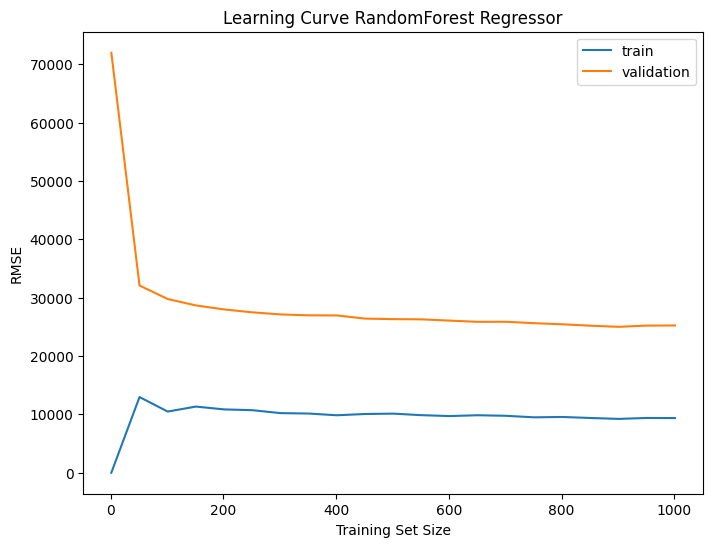

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve (
    estimator=model1,
    X=X,
    y=y,
    cv=5,
    scoring='neg_mean_squared_error',
    train_sizes = np.arange(1, 1042, step=50) # Memulai dari 1 dan bertambah sebanyak 50 setiap langkah
)

train_rmse = np.sqrt(-train_scores)  # Mengambil akar kuadrat dari skor kesalahan train
test_rmse = np.sqrt(-test_scores)    # Mengambil akar kuadrat dari skor kesalahan validasi

train_mean = train_rmse.mean(axis=1)
test_mean = test_rmse.mean(axis=1)

plt.subplots(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='train')
plt.plot(train_sizes, test_mean, label='validation')
plt.title('Learning Curve RandomForest Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()


In [ ]:

from sklearn.model_selection import GridSearchCV

# Definisikan rentang hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 6, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Buat objek GridSearchCV untuk pencarian grid hyperparameter
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Latih model pada data pelatihan dan lakukan pencarian grid hyperparameter
grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik dan kinerja terbaik
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_)**0.5
print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE: {best_rmse}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 24910.717943486077


#Evaluasi Akhir

In [ ]:
from sklearn.metrics import mean_squared_error

# Latih model dengan hyperparameter terbaik
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2  : {r2}")

RMSE: 24459.404752185073
MSE : 598262480.8312137
MAE : 17211.151102539785
R2  : 0.8653038974090519
